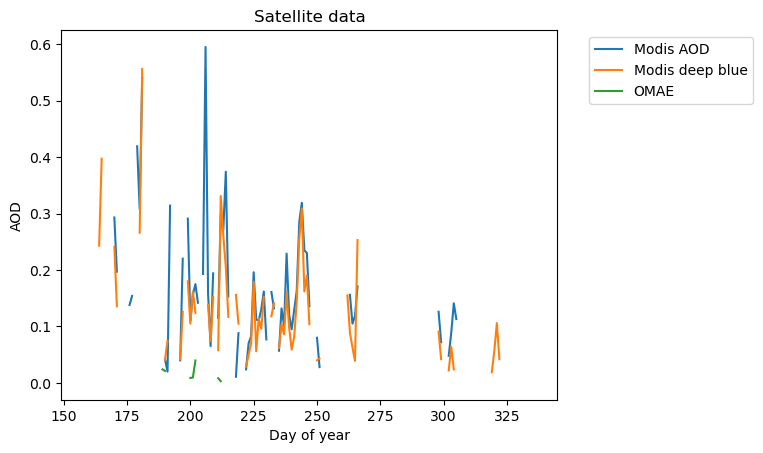

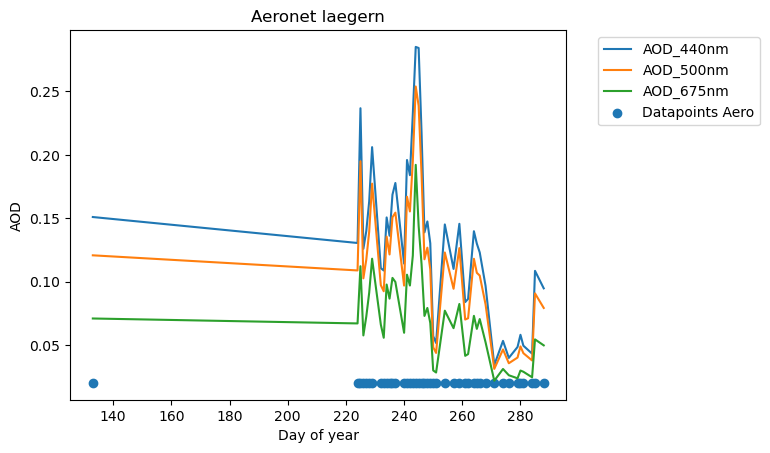

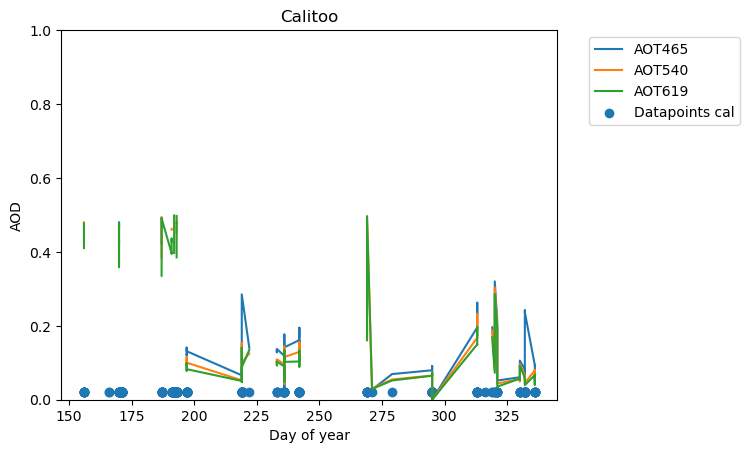

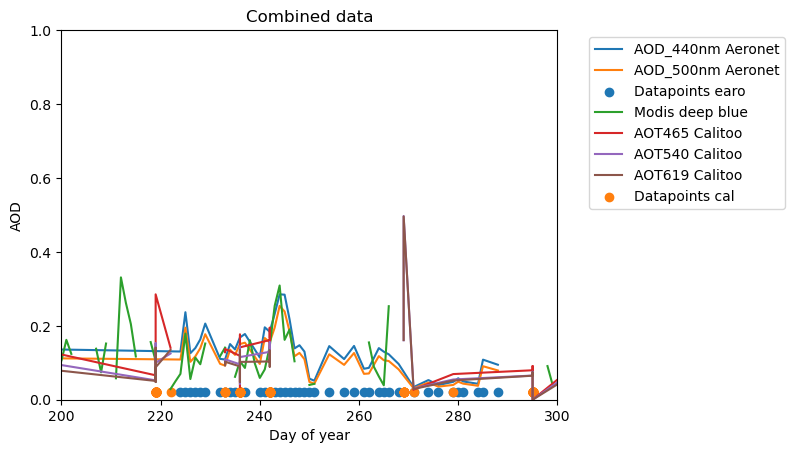

110
71
102


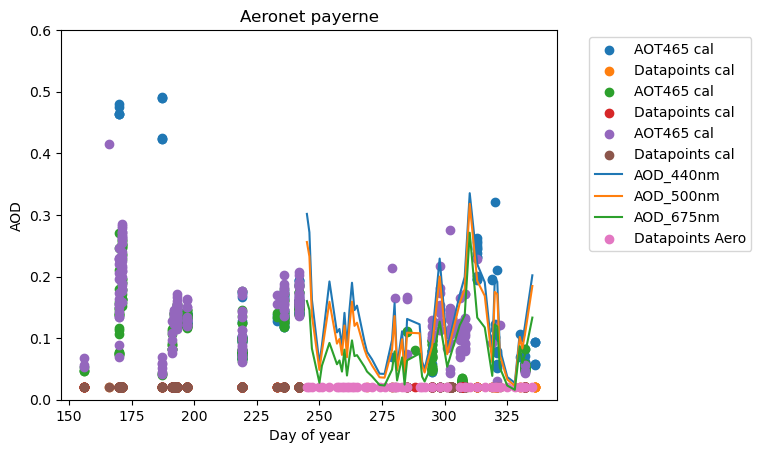

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,...,N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)
0,2024-09-01,12:00:00,245,0.042677,0.085344,0.108909,-999.0,-999.0,0.160160,-999.0,...,94,94,94,0,lev15,1390,Payerne,46.812408,6.942019,491.0
1,2024-09-02,12:00:00,246,0.035440,0.074066,0.096695,-999.0,-999.0,0.145716,-999.0,...,46,46,46,0,lev15,1390,Payerne,46.812408,6.942019,491.0
2,2024-09-03,12:00:00,247,0.021355,0.043489,0.056693,-999.0,-999.0,0.083099,-999.0,...,86,86,86,0,lev15,1390,Payerne,46.812408,6.942019,491.0
3,2024-09-06,12:00:00,250,0.006872,0.015253,0.019976,-999.0,-999.0,0.027592,-999.0,...,47,47,47,0,lev15,1390,Payerne,46.812408,6.942019,491.0
4,2024-09-07,12:00:00,251,0.029181,0.040161,0.045521,-999.0,-999.0,0.055251,-999.0,...,77,77,77,0,lev15,1390,Payerne,46.812408,6.942019,491.0
5,2024-09-10,12:00:00,254,0.015358,0.040808,0.056490,-999.0,-999.0,0.092232,-999.0,...,49,49,49,0,lev15,1390,Payerne,46.812408,6.942019,491.0
6,2024-09-13,12:00:00,257,0.015831,0.030293,0.037592,-999.0,-999.0,0.057611,-999.0,...,7,7,7,0,lev15,1390,Payerne,46.812408,6.942019,491.0
7,2024-09-14,12:00:00,258,0.019376,0.035006,0.043380,-999.0,-999.0,0.063790,-999.0,...,42,42,41,0,lev15,1390,Payerne,46.812408,6.942019,491.0
8,2024-09-15,12:00:00,259,0.009616,0.022330,0.029951,-999.0,-999.0,0.045688,-999.0,...,130,130,129,0,lev15,1390,Payerne,46.812408,6.942019,491.0
9,2024-09-16,12:00:00,260,0.032796,0.049057,0.058386,-999.0,-999.0,0.081323,-999.0,...,7,7,7,0,lev15,1390,Payerne,46.812408,6.942019,491.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from satellite_and_aeronet import calitoo, aeronet
from IPython.display import display 


filenames = [r'../daten calitoo/0124_20240604_075512_10_ours.txt', r'../daten calitoo/0425_20240604_082717_10.txt', r'../daten calitoo/0427_20240604_082717_10.txt']
columns_with_commas = ['Elevation', 'AOT465', 'AOT540', 'AOT619', 'Alpha', 'R²']
columns_to_numbers = ['Temperature', 'Pression', 'RAW465', 'RAW540', 'RAW619','Elevation', 'AOT465', 'AOT540', 'AOT619', 'Alpha', 'R²']

locations = ['laegern', 'payerne']
coord_threshold = [4700,800,4770,870] # lat0, long0, lat1, long1
coord_threshold = [4500, 8, 4900, 1000]
alpha_threshold = 2
r_threshold = 0.8
aot_threshold = 0.8

def plot_calitoo(dataframe):
    wavelengths_cal = ['AOT465'] #, 'AOT540', 'AOT619'
    for wavelength in wavelengths_cal:
        plt.scatter(dataframe['Date'].dt.dayofyear, dataframe[wavelength].where(dataframe[wavelength]<0.5), label=f'{wavelength} cal')
    plt.scatter(dataframe['Date'].dt.dayofyear, np.full((dataframe.shape[0],), 0.02), label='Datapoints cal')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Day of year')
    plt.ylabel('AOD')
    plt.title('Calitoo')
    plt.ylim([0,0.6])


for index, filename in enumerate(filenames):
    data = pd.read_csv(filenames[index], skiprows=6, delimiter=';')
    columns_with_commas = ['Elevation', 'AOT465', 'AOT540', 'AOT619', 'Alpha', 'R²']
    if index == 0:
        for column in columns_with_commas:
            data[column] = pd.to_numeric(data[column].str.replace(',', '.'), errors='coerce')
            
    data = data.replace('-.--', np.nan)

    for column in columns_to_numbers:
        data[column] = pd.to_numeric(data[column])
    data['Latitude'] = pd.to_numeric(data['Latitude'].str.replace('N', ''), errors='coerce')
    data['Longitude'] = pd.to_numeric(data['Longitude'].str.replace('E', ''), errors='coerce')
    data['Altitude'] = pd.to_numeric(data['Altitude'].str.replace('E', ''), errors='coerce')
    data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
    data['Time'] = data['Time'].str.replace('.', '0')
    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S',  errors='coerce').dt.time
    
    filtered_data = data[
        # Latitude condition (between lat0 and lat1)
        (data['Latitude'] >= coord_threshold[0]) & 
        (data['Latitude'] <= coord_threshold[2]) & 
        
        # Longitude condition (between long0 and long1)
        (data['Longitude'] >= coord_threshold[1]) & 
        (data['Longitude'] <= coord_threshold[3]) & 
        
        # Alpha threshold condition 
        (data['Alpha'] <= alpha_threshold) & 
        
        # R² threshold condition
        (data['R²'] >= r_threshold)&

        (data['AOT465']< aot_threshold)&
        (data['AOT540']< aot_threshold)&
        (data['AOT540']< aot_threshold)
    ]
    print(data.isna().sum().sum())



    plot_calitoo(filtered_data)
    #display(filtered_data)

aeronet(locations[1])
